<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from pathlib import Path
import zipfile

data = Path('data')
image_path = data/'piza_stake_sushi'

if image_path.is_dir():
  print('the image directory exists')
else:
  image_path.mkdir(parents = True, exist_ok = True)

In [ ]:
import requests
with open(data/'pizza_steak_sushi.zip', 'wb') as f:
  req = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(req.content)


In [ ]:
import zipfile
with zipfile.ZipFile(data/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping the files')
  zip_ref.extractall(image_path)

unzipping the files


# **Becoming one with the data**

In [ ]:
import os
os.walk(image_path)

<generator object _walk at 0x7ec5138d8ba0>

In [ ]:
def oswalk(dirpath):

  for dirpath, dirnames, filepath in os.walk(dirpath):
    print(f'the dirpath is {dirpath} file path is {len(filepath)} dir name is {len(dirnames)}')

In [ ]:
oswalk(image_path)

the dirpath is data/piza_stake_sushi file path is 0 dir name is 2
the dirpath is data/piza_stake_sushi/train file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/train/steak file path is 75 dir name is 0
the dirpath is data/piza_stake_sushi/train/pizza file path is 78 dir name is 0
the dirpath is data/piza_stake_sushi/train/sushi file path is 72 dir name is 0
the dirpath is data/piza_stake_sushi/test file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/test/steak file path is 19 dir name is 0
the dirpath is data/piza_stake_sushi/test/pizza file path is 25 dir name is 0
the dirpath is data/piza_stake_sushi/test/sushi file path is 31 dir name is 0


In [ ]:
image_path

PosixPath('data/piza_stake_sushi')

In [ ]:
train_dir = image_path / 'train'
test_dir = image_path/'test'

# **Visualizing the image**

In [ ]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))


In [ ]:
random_image = random.choice(image_path_list)
random_image

PosixPath('data/piza_stake_sushi/train/steak/1647351.jpg')

In [ ]:
class_of_random = random_image.parent.stem

Random image path is data/piza_stake_sushi/train/steak/1647351.jpg
image class is steak
image height : 512
image width : 512


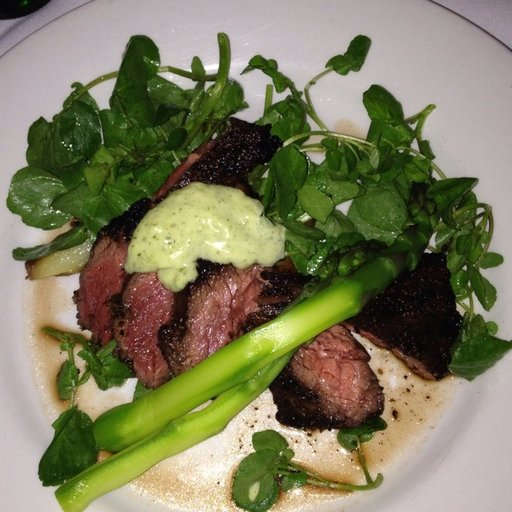

In [ ]:
img = Image.open(random_image)
print(f'Random image path is {random_image}')
print(f'image class is {class_of_random}')
print(f'image height : {img.height}')
print(f'image width : {img.width}')
img

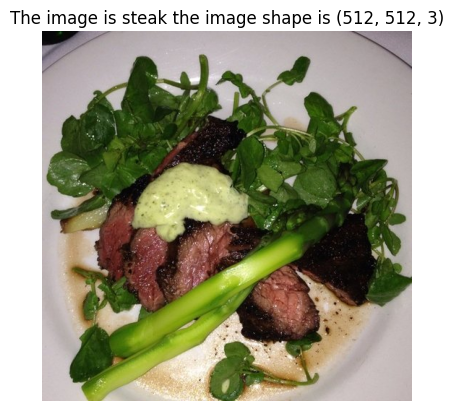

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_np = np.asarray(img)

plt.imshow(img);
plt.title(f'The image is {class_of_random} the image shape is {image_np.shape}');
plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

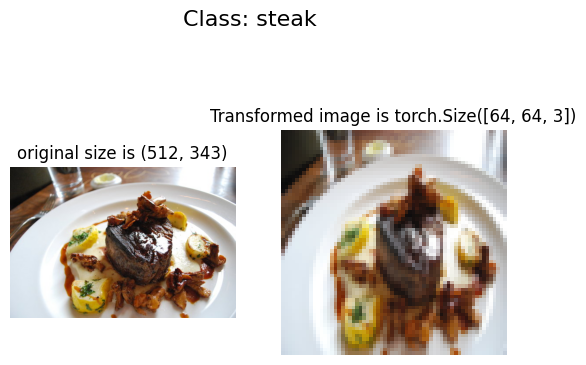

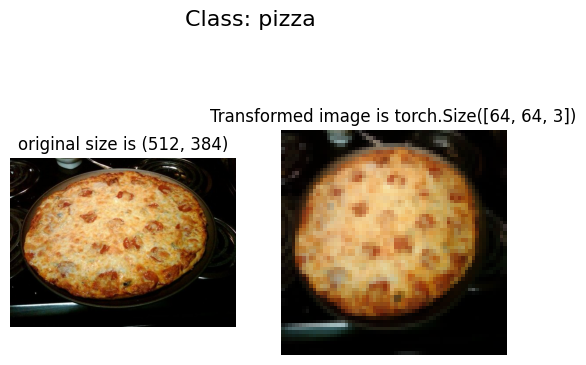

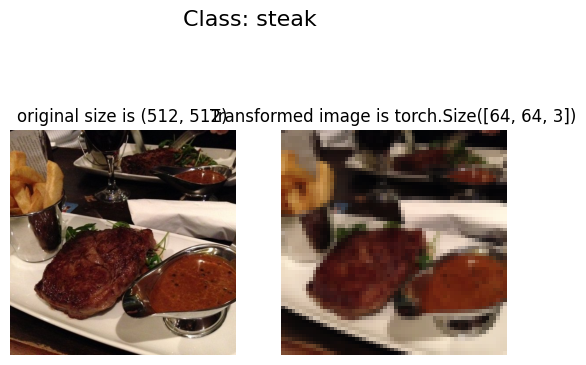

In [ ]:
def plot_transformed_images(image_paths, transform, n =3, seed = 43):
  """ This function will plot the images before and after transforming side by side"""

  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f'original size is {f.size}')
      ax[0].axis('off');

      #Transform and plot image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed image is {transformed_image.shape}')
      ax[1].axis('off');

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize = 16)


plot_transformed_images(image_path_list, data_transform, 3)








# **Loading Image Data Using Image Loader**

In [ ]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [ ]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = train_dir,
                                     transform = data_transform,
                                     target_transform = None)
test_dataset = datasets.ImageFolder(root = test_dir,
                                    transform = data_transform,
                                    target_transform = None)


In [ ]:
len(train_dataset), len(test_dataset)

(225, 75)

In [ ]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/piza_stake_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
class_names = train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_dataset.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
image, label = train_dataset[0]

print(f'the image shape: {image.shape}')
print(f'the label shape: {label}')
print(f'the image dtype: {image.dtype}')
print(f'the label dtype: {type(label)}')

the image shape: torch.Size([3, 64, 64])
the label shape: 0
the image dtype: torch.float32
the label dtype: <class 'int'>


the image shape is torch.Size([3, 64, 64]) the permuted shape is torch.Size([64, 64, 3])


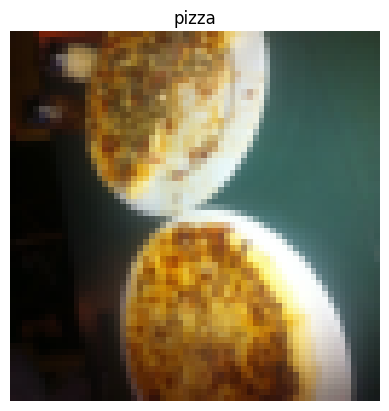

In [ ]:
permuted_image = image.permute(2,1,0)
print(f'the image shape is {image.shape} the permuted shape is {permuted_image.shape}')
plt.imshow(permuted_image)
plt.title(class_names[label])
plt.axis('off');


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size = 32,shuffle = True)
test_dataloader = DataLoader (test_dataset, batch_size = 32, shuffle = True)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ec5137e54b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ec50c9dc430>)

In [ ]:
image, label = next(iter(train_dataloader))

In [ ]:
image.shape

torch.Size([32, 3, 64, 64])

In [ ]:
label.shape

torch.Size([32])

# **Loading Image with custom Datasets**

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [ ]:
train_dataset.classes, test_dataset.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
image_path

PosixPath('data/piza_stake_sushi')

In [ ]:
os.scandir(image_path/'train')

In [ ]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [ ]:
for entry in os.scandir(train_dir):
  print(entry)

<DirEntry 'steak'>
<DirEntry 'pizza'>
<DirEntry 'sushi'>


In [ ]:
def find_classes(directory):
  classes = []
  class_dic = {}
  for entry in os.scandir(directory):
    classes.append(entry.name)
  for i, classname in enumerate(classes):
    class_dic[classname] = i
  return classes, class_dic

In [ ]:
find_classes(train_dir)

(['steak', 'pizza', 'sushi'], {'steak': 0, 'pizza': 1, 'sushi': 2})

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self, target_dir:str,transform = None) -> None:

    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)

  def load_image(self, index:int):
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self,index:int) -> Tuple[torch.tensor, int]:

    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                     transform = test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7ec50d0c7ee0>,
 <__main__.ImageFolderCustom at 0x7ec50d0c62f0>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['steak', 'pizza', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'steak': 0, 'pizza': 1, 'sushi': 2}

# **Create a function to display Random Images**

In [ ]:
def display_random_images(train_dataset = train_dataset, classes= False, n = 10, img_shape = False, seed = None):

  if n>10:
    n = 10
    print('we cant print images more than 10')

  random.seed(seed)
  images = random.sample(range(len(train_dataset)), k= n)
  print(images)

  plt.figure(figsize = (16,9))
  # print('plt is right')
  for i in range(len(images)):
    # print('starting images')
    plt.subplot(5,2,i+1)
    # print('sub plot is right')
    img,label = train_dataset[images[i]]
    trans_img = img.permute(1,2,0)
    plt.imshow(trans_img)
    tit = ''
    if classes:
      tit = tit + 'the class name is ' + class_names[label]
    if img_shape:
      tit +='  and  '
      tit += str(img.shape)
    plt.title(tit)
  plt.tight_layout()
  plt.show()


we cant print images more than 10
[51, 29, 35, 17, 1, 37, 116, 106, 219, 62]


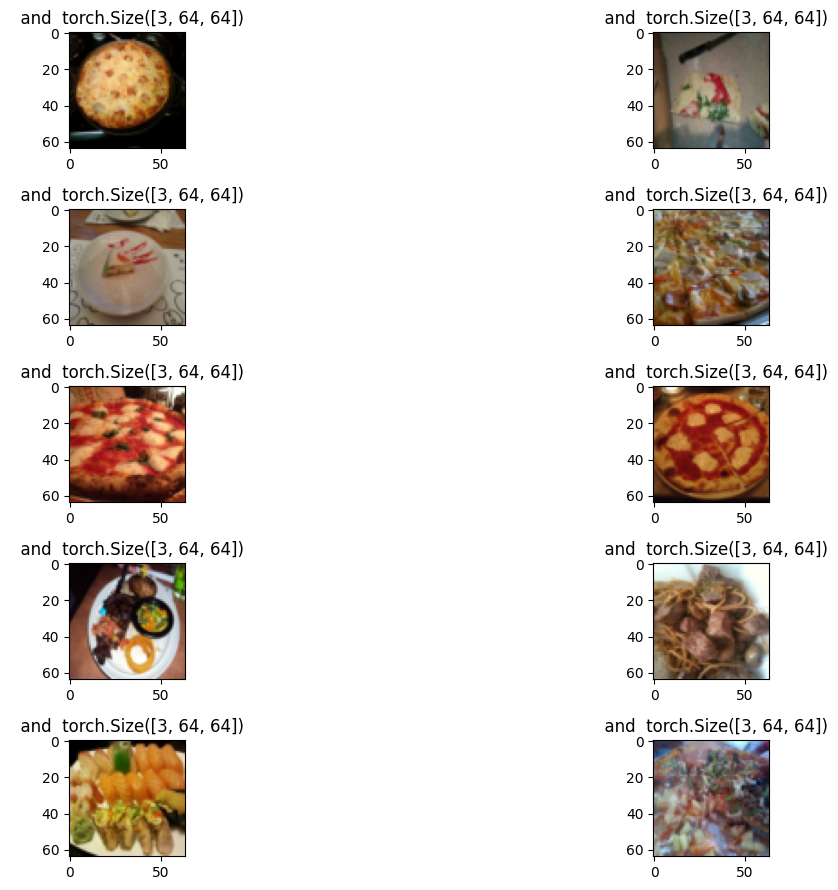

In [ ]:
display_random_images(classes = False, n = 12, img_shape = True, seed = None)

# **Plot the image with out custom generated datasets**

[190, 216, 201, 49, 121, 62, 63, 115, 183, 140]


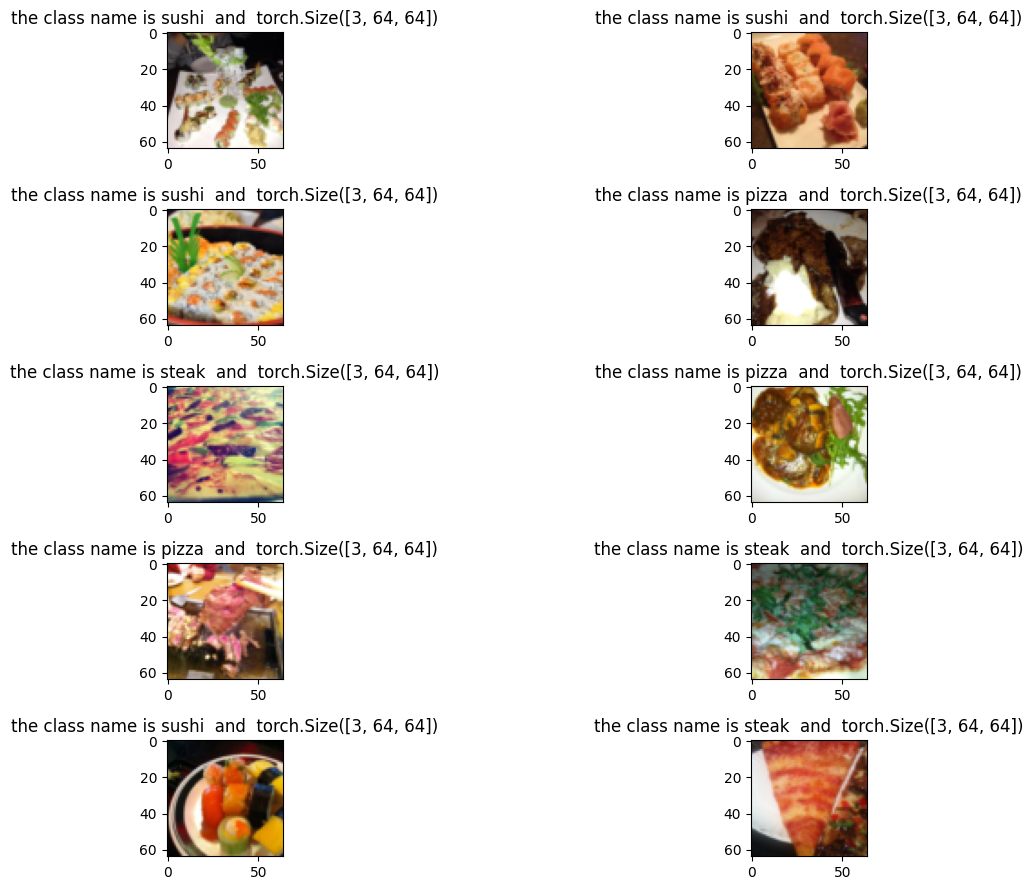

In [ ]:
display_random_images(train_dataset = train_data_custom,classes = True, n= 10, img_shape = True, seed= None)

In [ ]:
train_data_custom

In [ ]:
train_dataset # we see that the variable passed don't show impact outside the function

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/piza_stake_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

# **Load the custom made data into dataloaders**

In [ ]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size = 32,
                                     shuffle = True,
                                     num_workers =1)

test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size = 32,
                                    num_workers= 1)


In [ ]:
train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7ec50bdf4580>,
 <torch.utils.data.dataloader.DataLoader at 0x7ec50bdf4790>)

In [ ]:
image, label = next(iter(train_dataloader))

print(f'the image shape is {image.shape}')
print(f'the label shape is {label.shape}')

the image shape is torch.Size([32, 3, 64, 64])
the label shape is torch.Size([32])


**Test the trivial augumenation**

In [ ]:
from torchvision import transforms
triv_train_transform = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(31),
    transforms.ToTensor()

])

triv_test_transform = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [ ]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [ ]:
len(image_path_list)

300

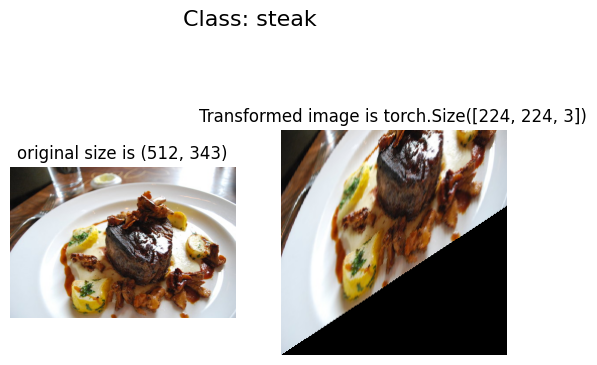

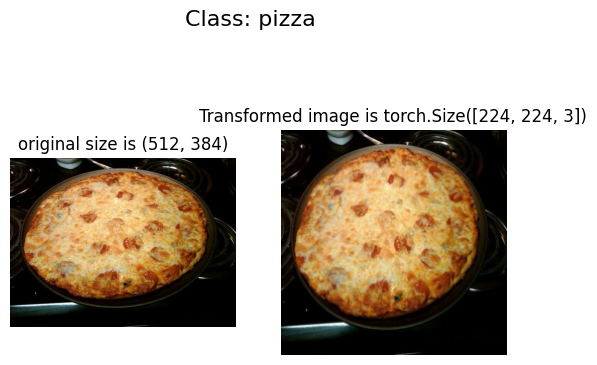

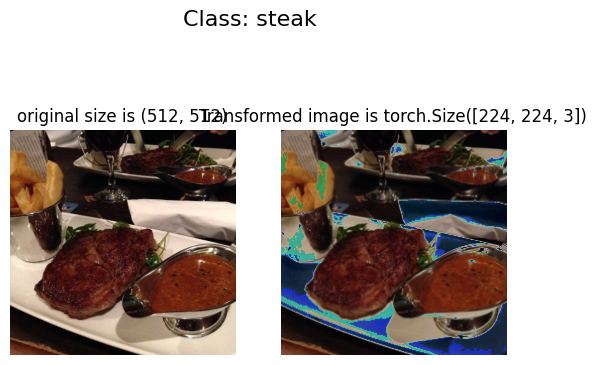

In [ ]:
plot_transformed_images(image_path_list, transform = triv_train_transform,n = 3)

In [ ]:
image_path_list[0]

PosixPath('data/piza_stake_sushi/train/steak/1225762.jpg')

In [ ]:
train_dir

PosixPath('data/piza_stake_sushi/train')

**Train model 0**

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = train_dir,transform = simple_transform)
test_dataset = datasets.ImageFolder(root= test_dir,transform = simple_transform)

In [ ]:
import os
NUM_WORKERS = os.cpu_count()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True, num_workers= NUM_WORKERS)
test_dataloader = DataLoader(dataset = test_dataset, batch_size = 32,shuffle = False, num_workers = NUM_WORKERS)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ec50bc83850>,
 <torch.utils.data.dataloader.DataLoader at 0x7ec50bc82650>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [ ]:
image, label = (next(iter(train_dataloader)))

In [ ]:
image[0].shape

torch.Size([3, 64, 64])

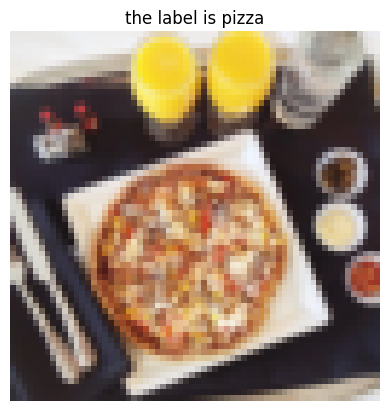

In [ ]:
per_img = image[0].permute(1,2,0)
plt.imshow(per_img)
plt.title(f'the label is {class_names[label[0]]}')
plt.axis(False);

**Implementing Tiny VGG**

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()

    self.block1 = nn.Sequential(
        nn.Conv2d(3,10,kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU()
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(10, 10,kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride =2)
    )

    self.block3 = nn.Sequential(
        nn.Conv2d(10,10, kernel_size = 3, stride = 1,padding = 0),
        nn.ReLU()
    )

    self.block4 = nn.Sequential(
        nn.Conv2d(10,10, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(10 * 13 * 13, 32),  # 2890 instead of 289
        nn.ReLU(),
        nn.Linear(32, output_shape),
        nn.Softmax(dim=1),
    )


  def forward(self,x):

    x = self.block1(x)
    # print(f'the first layer output is {x.shape}')
    x = self.block2(x)
    # print(f'the secodn is {x.shape}')
    x = self.block3(x)
    # print(f'the thirs is {x.shape}')
    x = self.block4(x)
    # print(f'the foruth is {x.shape}')
    x = self.classifier(x)
    return x

model0 = TinyVGG(input_shape = 3, output_shape = len(class_names))
model0

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=3, bias=True)
    (4): Softmax(dim=1)
  )
)

In [ ]:
dummy_img = torch.randn(1, 3, 64, 64)
output = model0(dummy_img)

In [ ]:
output.shape

torch.Size([1, 3])

In [ ]:
!pip install torchinfo > /dev/null 2>&1

In [ ]:
from torchinfo import summary

In [ ]:
summary(model0, input_size = (32,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 62, 62]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
├─Sequential: 1-2                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-3                        [32, 10, 28, 28]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
├─Sequential: 1-4                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU

In [ ]:
from sklearn.metrics import accuracy_score
def accuracy(y_test, y_preds):
  return accuracy_score(y_test, y_preds)

In [ ]:
len(train_dataloader)

8

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train_model(model,epochs,data,loss_fn, optimizer):
  """
  This function will train the model.
  input :
  Model you want to train.
  number of epochs you want to train on
  data that you want to train on,
  loss function you want to use,
  optimizer of your choice"""

  model.train()
  total_loss = 0
  train_acc = 0
  for train_data, train_labels in data:
    y_logits = model(train_data)
    train_loss = loss_fn(y_logits, train_labels)
    total_loss += train_loss.item()
    y_preds = y_logits.argmax(dim = 1)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_acc += accuracy(train_labels, y_preds)
    # train_acc += (y_preds == train_labels).sum().item()/len(train_data)
  train_acc = train_acc / (len(data))

  # if epoch%10 ==0:
  #   print(f'epoch:{epoch} -> trainloss:{total_loss/len(data)} -> train_acc: {train_acc}')
  return total_loss/len(data), train_acc


def test_model(model,data,loss_fn):
  """
  This function is used to test the model.
  input:
  Model you want to test,
  The test data,
  The loss function you want to use as metric
  """
  model.eval()
  total_loss = 0
  test_acc = 0
  with torch.inference_mode():
    for test_data, test_labels in data:
      y_logits = model(test_data)
      test_loss = loss_fn(y_logits, test_labels)
      total_loss += test_loss.item()
      test_preds = y_logits.argmax(dim = 1)
      batch_acc = accuracy(test_labels, test_preds)
      test_acc += batch_acc
  return total_loss/len(data), test_acc/len(data)

  # print(f'The test_loss is : {total_loss/len(data)} -> test_acc: {test_acc/len(data)}')




In [ ]:
model0 = TinyVGG(input_shape = 3, output_shape = len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.001)

In [ ]:

train_model(model0, 5, train_dataloader, loss_fn,optimizer)
test_model(model0, test_dataloader, loss_fn)

(1.0962379376093547, 0.2604166666666667)

In [ ]:
def train(model, epochs, train_data,test_data,loss_fn, optimizer):
  result = {}
  training_accuracies = []
  testing_accuracies = []
  training_losses = []
  testing_losses = []
  for epoch in tqdm(range(epochs)):
    train_loss, train_accuracy = train_model(model, epochs, train_data, loss_fn, optimizer)
    test_loss, test_accuracy = test_model(model, test_data, loss_fn)
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)
    training_losses.append(train_loss)
    testing_losses.append(test_loss)
    print(f'epoch:{epoch} -> trainloss:{train_loss} -> train_acc: {train_accuracy} -> test_acc:{test_accuracy}-> test_loss:{test_loss}')
  result['train_accuracies'] = training_accuracies
  result['test_accuracies'] = testing_accuracies
  result['testing_losses'] = testing_losses
  result['training_losses'] = training_losses
  return result


In [ ]:
model0 = TinyVGG(input_shape = 3, output_shape = len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.001)

In [ ]:
result_0 = train(model0, 10,train_dataloader, test_dataloader, loss_fn,optimizer )

  0%|          | 0/10 [00:00<?, ?it/s]

epoch:0 -> trainloss:1.1059763878583908 -> train_acc: 0.2734375 -> test_acc:0.2604166666666667-> test_loss:1.1141246159871419
epoch:1 -> trainloss:1.1028101742267609 -> train_acc: 0.3046875 -> test_acc:0.2604166666666667-> test_loss:1.1100474993387859
epoch:2 -> trainloss:1.0983785539865494 -> train_acc: 0.3046875 -> test_acc:0.2604166666666667-> test_loss:1.1050288677215576
epoch:3 -> trainloss:1.0947097539901733 -> train_acc: 0.3046875 -> test_acc:0.2916666666666667-> test_loss:1.1084819237391155
epoch:4 -> trainloss:1.0935588479042053 -> train_acc: 0.5234375 -> test_acc:0.2708333333333333-> test_loss:1.1121726036071777
epoch:5 -> trainloss:1.0915485620498657 -> train_acc: 0.5078125 -> test_acc:0.2708333333333333-> test_loss:1.1133664846420288
epoch:6 -> trainloss:1.0835046470165253 -> train_acc: 0.52734375 -> test_acc:0.25-> test_loss:1.1134942372639973
epoch:7 -> trainloss:1.0630087554454803 -> train_acc: 0.4921875 -> test_acc:0.28125-> test_loss:1.121253212292989
epoch:8 -> trainl

In [ ]:
result_0

{'train_accuracies': [0.2734375,
  0.3046875,
  0.3046875,
  0.3046875,
  0.5234375,
  0.5078125,
  0.52734375,
  0.4921875,
  0.37890625,
  0.56640625],
 'test_accuracies': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2916666666666667,
  0.2708333333333333,
  0.2708333333333333,
  0.25,
  0.28125,
  0.2604166666666667,
  0.28125],
 'testing_losses': [1.1141246159871419,
  1.1100474993387859,
  1.1050288677215576,
  1.1084819237391155,
  1.1121726036071777,
  1.1133664846420288,
  1.1134942372639973,
  1.121253212292989,
  1.1209675868352253,
  1.116500993569692],
 'training_losses': [1.1059763878583908,
  1.1028101742267609,
  1.0983785539865494,
  1.0947097539901733,
  1.0935588479042053,
  1.0915485620498657,
  1.0835046470165253,
  1.0630087554454803,
  1.0791608691215515,
  1.0133367404341698]}

In [ ]:
def plot_loss_curves(result):

  epochs = range(len(result['train_accuracies']))
  plt.figure(figsize= (12,6))
  plt.subplot(1,2,1)
  plt.plot(epochs,result['train_accuracies'], label = 'train_accuracy')
  plt.plot(epochs, result['test_accuracies'], label = 'test_accuracy')
  plt.title('The plot of accuracies')
  plt.xlabel('epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, result['training_losses'], label = 'train_loss')
  plt.plot(epochs, result['testing_losses'], label = 'test_loss')
  plt.title('The plot of losses')
  plt.xlabel('epochs')
  plt.legend()


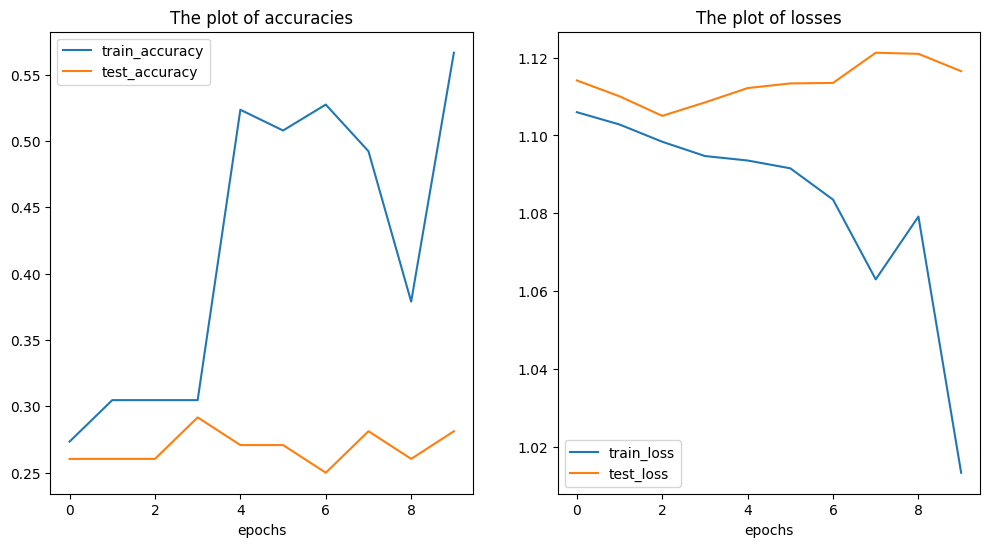

In [ ]:
plot_loss_curves(result_0)

# **Model 1 TinyVGG with Data Augumentation**

In [ ]:
train_transform_trivial_augment = transforms.Compose([
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

test_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64,64)),
      transforms.ToTensor()
])


In [ ]:
from torchvision import datasets
train_data_aug = datasets.ImageFolder(root = train_dir, transform = train_transform_trivial_augment)
test_data_aug = datasets.ImageFolder(root = test_dir, transform = test_transform_trivial_augment)

In [ ]:
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()
train_dataloader_aug = DataLoader(dataset = train_data_aug,
                                  batch_size = 32,
                                  shuffle = True,
                                  num_workers = NUM_WORKERS)

test_dataloader_aug = DataLoader(dataset = test_data_aug,
                                 batch_size = 32,
                                 num_workers= NUM_WORKERS)

In [ ]:
train_dataloader_aug, test_dataloader_aug

(<torch.utils.data.dataloader.DataLoader at 0x7ec4f712c190>,
 <torch.utils.data.dataloader.DataLoader at 0x7ec50baa1000>)

In [ ]:
images, labels = next(iter(train_dataloader_aug))

**Have some visualization of the augumented images**

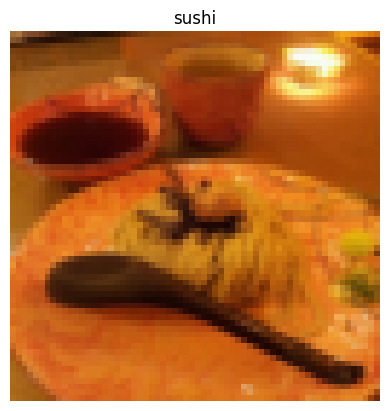

In [ ]:
ran = random.randint(0,len(images)-1)
plt.imshow(images[ran].permute(1,2,0))
plt.title(class_names[labels[ran]])
plt.axis(False);

Build model 1 using the augumented images

In [ ]:
model1 = TinyVGG(input_shape = 3, output_shape = len(class_names))

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model1.parameters(),lr = 0.001)

In [ ]:
result_1 = train(model1,10, train_dataloader_aug, test_dataloader_aug, loss_fn,optimizer)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch:0 -> trainloss:1.0963923335075378 -> train_acc: 0.30859375 -> test_acc:0.2604166666666667-> test_loss:1.1180760860443115
epoch:1 -> trainloss:1.1041437834501266 -> train_acc: 0.3046875 -> test_acc:0.19791666666666666-> test_loss:1.1151550610860188
epoch:2 -> trainloss:1.0927388370037079 -> train_acc: 0.4140625 -> test_acc:0.19791666666666666-> test_loss:1.1063720385233562
epoch:3 -> trainloss:1.0872243344783783 -> train_acc: 0.4140625 -> test_acc:0.19791666666666666-> test_loss:1.1039599577585857
epoch:4 -> trainloss:1.0962617695331573 -> train_acc: 0.29296875 -> test_acc:0.2604166666666667-> test_loss:1.1014877557754517
epoch:5 -> trainloss:1.0931980907917023 -> train_acc: 0.4453125 -> test_acc:0.3020833333333333-> test_loss:1.1098351279894512
epoch:6 -> trainloss:1.0592376440763474 -> train_acc: 0.4140625 -> test_acc:0.43276515151515155-> test_loss:1.0590014060338337
epoch:7 -> trainloss:1.026105523109436 -> train_acc: 0.49609375 -> test_acc:0.5842803030303031-> test_loss:0.998

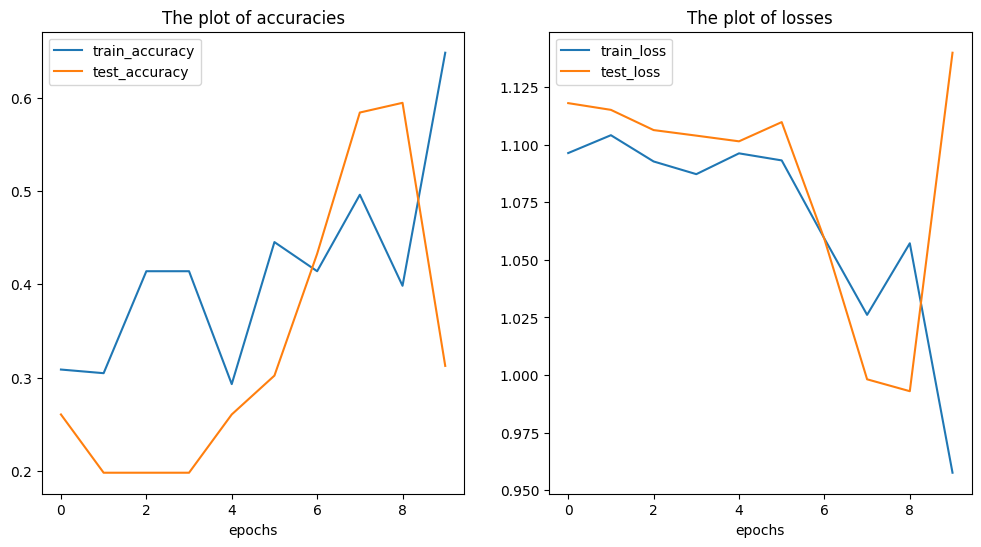

In [ ]:
plot_loss_curves(result_1)

**Compare the two models by their tesing accuracies and loss**

In [ ]:
def model_comparision(model1_acc, model2_acc, model1_loss, model2_loss):
  """ This fn will take model accuracies and model lossses as lists and plots them"""

  epochs = range(len(model1_acc))
  plt.figure(figsize = (12,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, model1_acc, label = 'model1 accuracy')
  plt.plot(epochs, model2_acc, label = 'model2 accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, model1_loss, label = ['model1 loss'])
  plt.plot(epochs, model2_loss, label = ['model2 loss'])
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()



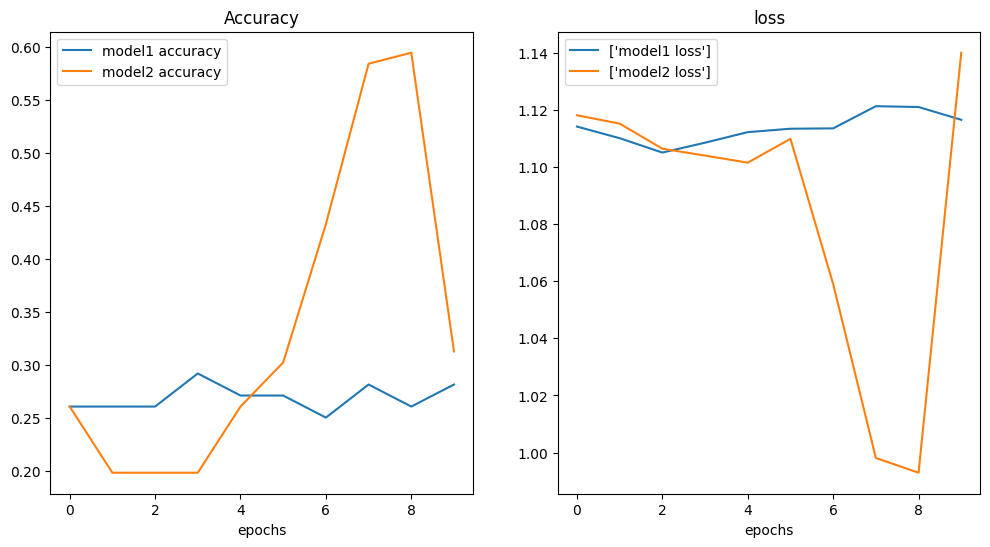

In [ ]:
model_comparision(result_0['test_accuracies'],result_1['test_accuracies'], result_0['testing_losses'],result_1['testing_losses'])

**Make a custom prediction the pizza dad image**

In [ ]:
data

PosixPath('data')

In [ ]:
import requests

custom_image_path = data/'pizza_dad.jpeg'
print(custom_image_path)
if custom_image_path.is_file():
  print('There is an image already existing you can use it')
else:
  with open(custom_image_path, 'wb') as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    image = request.content
    f.write(image)

data/pizza_dad.jpeg


In [ ]:
import torchvision

In [ ]:
custom_image_uint = torchvision.io.read_image(path = custom_image_path)


In [ ]:
custom_image_uint.shape

torch.Size([3, 4032, 3024])

In [ ]:
custom_image_uint.dtype

torch.uint8

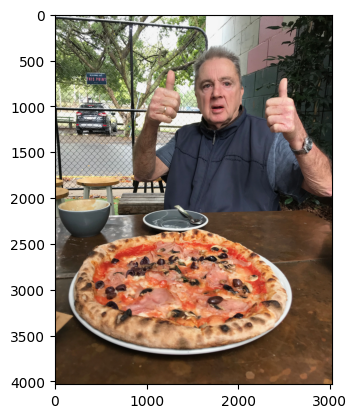

In [ ]:
plt.imshow(custom_image_uint.permute(1,2,0))

In [ ]:
custom_image_uint = custom_image_uint/255.

In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64,64)),

]
)

In [ ]:
custom_image_uint

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
trans_custom_image = custom_image_transform(custom_image_uint)

In [ ]:
trans_custom_image.shape

torch.Size([3, 64, 64])

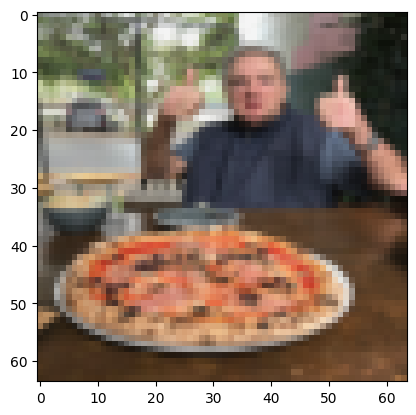

In [ ]:
plt.imshow(trans_custom_image.permute(1,2,0))

In [ ]:
model0.eval()
with torch.inference_mode():
  y_logits = model0(trans_custom_image.unsqueeze(dim = 0))
  y_pred = np.argmax(y_logits)
  print(f'the image is of {class_names[y_pred]}')

the image is of pizza
